<font size="5">Gooogle Stock Price:</font> 

In [211]:
import pandas as pd
import numpy as np
import sklearn.datasets
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 8)})

df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [212]:
def regression_score(y, predict):
    print("RMSE:", metrics.mean_squared_error(y, predict, squared=False))
    print("MSE:", metrics.mean_squared_error(y, predict, squared=True))
    print("R2:", metrics.r2_score(y, predict))
    print("MAPE:", metrics.mean_absolute_error(y, predict))

In [213]:
def gridsearchscore(regression):
    print(f'Best score: {regression.best_score_}, Best parameters: {regression.best_params_}')

In [214]:
def truepredplot(y_true, predicted):
    ax = sns.regplot(y=y_true, x=predicted)
    ax.set(xlabel='predicted values', ylabel='true values')
    plt.show()

In [215]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Volume'] = df_train['Volume'].apply(lambda x : x.replace(',', '')).astype(float)
df_train['Close'] = df_train['Close'].apply(lambda x : x.replace(',', '')).astype(float)
df_train.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,7380500.0
1,2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2,2012-01-05,329.83,330.75,326.89,657.21,6590300.0
3,2012-01-06,328.34,328.77,323.68,648.24,5405900.0
4,2012-01-09,322.04,322.29,309.46,620.76,11688800.0


In [216]:
corr = df_train.corr()
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.999692,0.999498,0.125832,-0.530506
High,0.999692,1.000000,0.999480,0.124351,-0.526936
Low,0.999498,0.999480,1.000000,0.129001,-0.538273
Close,0.125832,0.124351,0.129001,1.000000,0.192357
Volume,-0.530506,-0.526936,-0.538273,0.192357,1.000000


<AxesSubplot:>

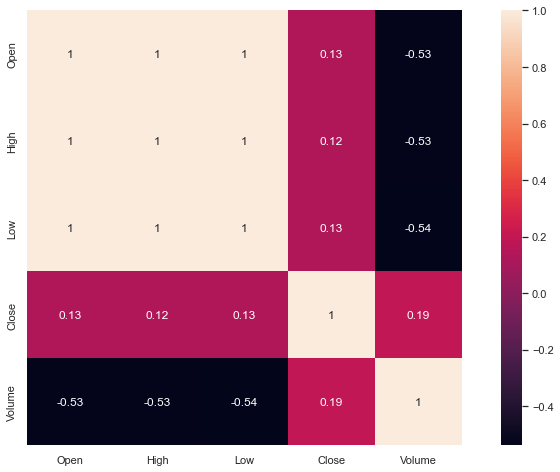

In [217]:
plt.figure(figsize = (14, 8))

sns.heatmap(corr, square=True, annot=True)

In [218]:
df_train['Day'] = df_train['Date'].dt.day
df_train['Month'] = df_train['Date'].dt.month
df_train['Year'] = df_train['Date'].dt.year
df_train.drop(columns=['Date'], inplace=True)

In [219]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Day'] = df_test['Date'].dt.day
df_test['Month'] = df_test['Date'].dt.month
df_test['Year'] = df_test['Date'].dt.year
df_test['Volume'] = df_test['Volume'].apply(lambda x : x.replace(',', '')).astype(float)
df_test.drop(columns=['Date'], inplace=True)
df_test.head()

,Open,High,Low,Close,Volume,Day,Month,Year
0,778.81,789.63,775.80,786.14,1657300.0,3,1,2017
1,788.36,791.34,783.16,786.90,1073000.0,4,1,2017
2,786.08,794.48,785.02,794.02,1335200.0,5,1,2017
3,795.26,807.90,792.20,806.15,1640200.0,6,1,2017
4,806.40,809.97,802.83,806.65,1272400.0,9,1,2017


In [220]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
 5   Day     1258 non-null   int64  
 6   Month   1258 non-null   int64  
 7   Year    1258 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 78.8 KB


<AxesSubplot:ylabel='Close'>

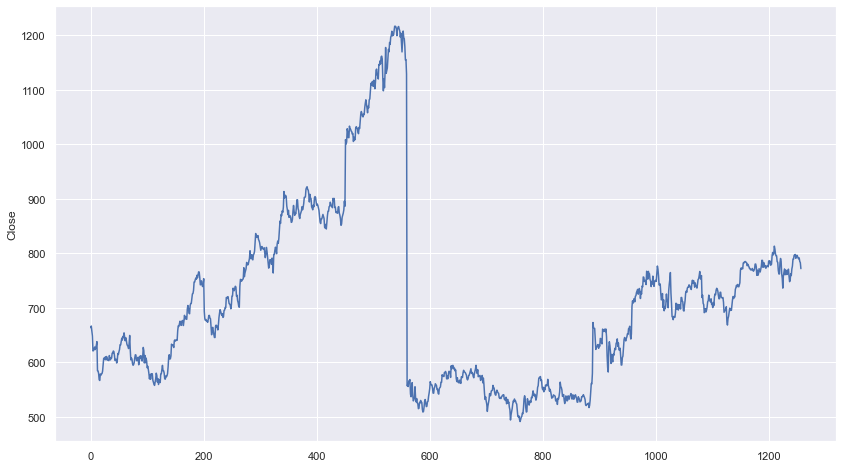

In [221]:
sns.lineplot(data=df_train['Close'])

In [222]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     float64
 5   Day     20 non-null     int64  
 6   Month   20 non-null     int64  
 7   Year    20 non-null     int64  
dtypes: float64(5), int64(3)
memory usage: 1.4 KB


In [223]:
df_train.describe()

,Open,High,Low,Close,Volume,Day,Month,Year
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06,15.724165,6.543720,2014.003180
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06,8.734085,3.426707,1.413647
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03,1.000000,1.000000,2012.000000
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06,8.000000,4.000000,2013.000000
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06,16.000000,7.000000,2014.000000
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06,23.000000,10.000000,2015.000000
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07,31.000000,12.000000,2016.000000


In [224]:
df_test.describe()

,Open,High,Low,Close,Volume,Day,Month,Year
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.0,20.0
mean,807.526000,811.926500,801.949500,807.904500,1.659895e+06,16.650000,1.0,2017.0
std,15.125428,14.381198,13.278607,13.210088,6.774747e+05,8.963523,0.0,0.0
min,778.810000,789.630000,775.800000,786.140000,9.193000e+05,3.000000,1.0,2017.0
25%,802.965000,806.735000,797.427500,802.282500,1.248500e+06,9.750000,1.0,2017.0
50%,806.995000,808.640000,801.530000,806.110000,1.418050e+06,17.500000,1.0,2017.0
75%,809.560000,817.097500,804.477500,810.760000,1.743400e+06,24.250000,1.0,2017.0
max,837.810000,841.950000,827.010000,835.670000,3.246600e+06,31.000000,1.0,2017.0


In [225]:
y_train = df_train['Close']
X_train = df_train.drop(['Close'], axis='columns')

In [226]:
y_test = df_test['Close']
X_test = df_test.drop(['Close'], axis='columns')

<font size="5">Почнемо з Linear regression з різними параметрами fit_intecept:</font> <br>
Будемо шукати найкращий параметр використовуючи GridSearchCV

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

linreg = LinearRegression()
parameters = {'fit_intercept': [True, False]}

linreg_gridsearch = GridSearchCV(linreg, parameters, scoring='neg_mean_squared_error', cv=5)

In [228]:
linreg_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [229]:
gridsearchscore(linreg_gridsearch)

Best score: -32381.801490702324, Best alpha: {'fit_intercept': True}


In [230]:
linreg_gridsearch.cv_results_

{'mean_fit_time': array([0.00480099, 0.00320067]),
 'std_fit_time': array([0.00391999, 0.00392001]),
 'mean_score_time': array([0.00159988, 0.00159969]),
 'std_score_time': array([0.00319977, 0.00319939]),
 'param_fit_intercept': masked_array(data=[True, False],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True}, {'fit_intercept': False}],
 'split0_test_score': array([-47159.53808206, -58665.06676257]),
 'split1_test_score': array([-44944.34308836, -64363.63866441]),
 'split2_test_score': array([-51565.40080823, -74035.58513773]),
 'split3_test_score': array([-13950.41461518, -18443.86947215]),
 'split4_test_score': array([-4289.31085968, -8860.16286874]),
 'mean_test_score': array([-32381.8014907 , -44873.66458112]),
 'std_test_score': array([19355.17235749, 26138.04066696]),
 'rank_test_score': array([1, 2])}

In [231]:
predict_lin = linreg_gridsearch.predict(X_test)

regression_score(y_test, predict_lin)

RMSE: 48.32049685650732
MSE: 2334.870416459734
R2: -13.084056322225324
MAPE: 40.58474620022565


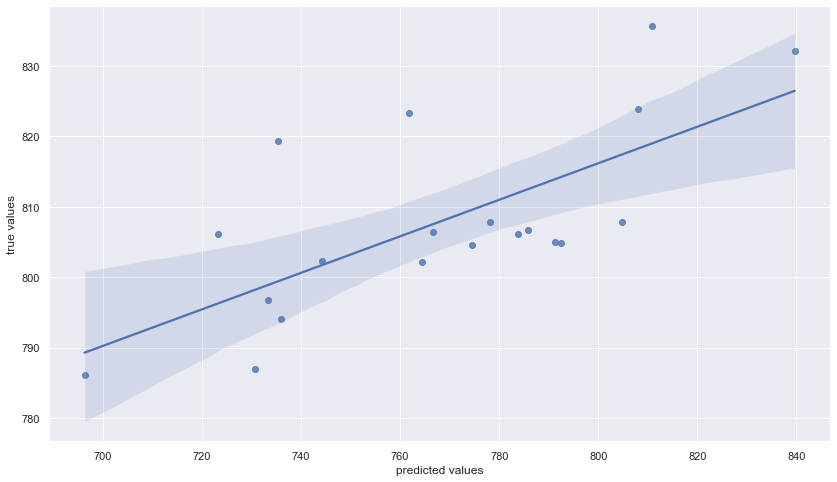

In [232]:
truepredplot(y_test, predict_lin)

In [233]:
predict_lin = linreg_gridsearch.predict(X_train)

regression_score(y_train, predict_lin)

RMSE: 119.63469262766378
MSE: 14312.459680115591
R2: 0.4722902307078136
MAPE: 94.52777226524492


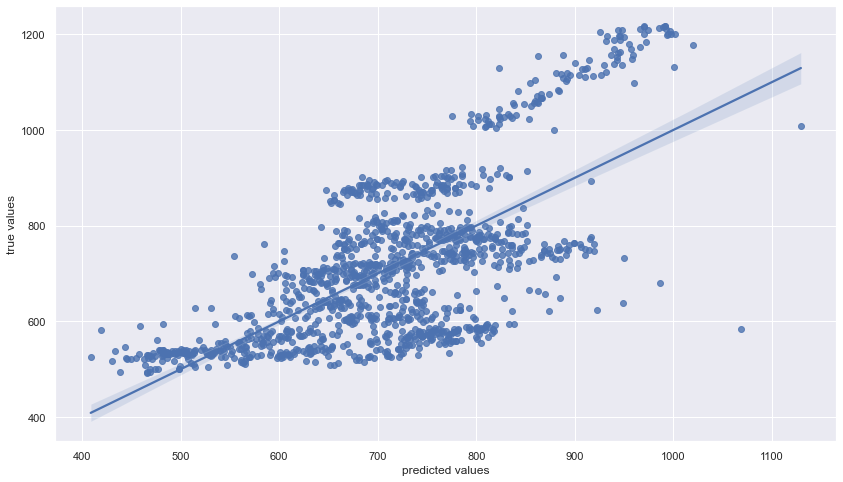

In [234]:
truepredplot(y_train, predict_lin)

З цього ми бачимо, що лінійна регресія дуже поганий вибір для прогнозування ринків, модель перенавчана і з цим нічого не зробиш, адже у період з 2012 року до 2017 (саме така вибірка йде у навчальному датасеті) потрібно шукати паттерни які допоможуть спрогнозувати ринок, а не коефіцієнти для пошуку рівняння під яке воно підійде <br>
До того ж йде інфляція і тому з кожним роком коефіцієнт повинен змінюватися.

<font size="5">Тепер спробуємо Rigde regression з різними параметрами alpha:</font> <br>
Будемо шукати найкращий параметр використовуючи GridSearchCV

In [235]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
parameters = {'alpha': [0, 0.1, 1, 2, 5]}

rigde_reg_gridsearch = GridSearchCV(ridge_reg, parameters, scoring='neg_mean_squared_error', cv=5)

In [236]:
rigde_reg_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0, 0.1, 1, 2, 5]},
             scoring='neg_mean_squared_error')

In [237]:
gridsearchscore(rigde_reg_gridsearch)

Best score: -32136.995274348952, Best alpha: {'alpha': 5}


In [238]:
rigde_reg_gridsearch.cv_results_

{'mean_fit_time': array([0.00316672, 0.00800362, 0.        , 0.        , 0.00476089]),
 'std_fit_time': array([0.00387894, 0.00011577, 0.        , 0.        , 0.0038879 ]),
 'mean_score_time': array([0.00643535, 0.00159974, 0.00799761, 0.00800381, 0.00323691]),
 'std_score_time': array([3.21832314e-03, 3.19948196e-03, 1.37793563e-05, 6.84157473e-06,
        3.96480642e-03]),
 'param_alpha': masked_array(data=[0, 0.1, 1, 2, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 2},
  {'alpha': 5}],
 'split0_test_score': array([-47159.53808661, -47163.05010323, -47194.65135898, -47229.74460786,
        -47334.83429899]),
 'split1_test_score': array([-44944.34308883, -44954.34465932, -45043.91119648, -45142.49351717,
        -45432.46296998]),
 'split2_test_score': array([-51565.4008078 , -51572.9936801 , -51641.5881598 , -51718.31210018,
        -51951.14279657

In [239]:
predict_ridge = rigde_reg_gridsearch.predict(X_test)

regression_score(y_test, predict_ridge)

RMSE: 47.528025002012505
MSE: 2258.913160591926
R2: -12.625878317063924
MAPE: 39.64648508004715


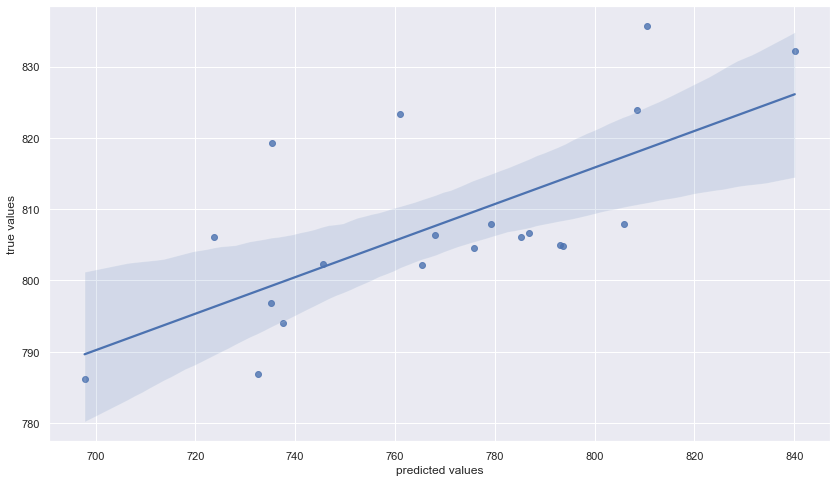

In [240]:
truepredplot(y_test, predict_ridge)

In [241]:
predict_ridge = rigde_reg_gridsearch.predict(X_train)

regression_score(y_train, predict_ridge)

RMSE: 119.65606338826055
MSE: 14317.573505575427
R2: 0.4721016806113295
MAPE: 94.18193259463095


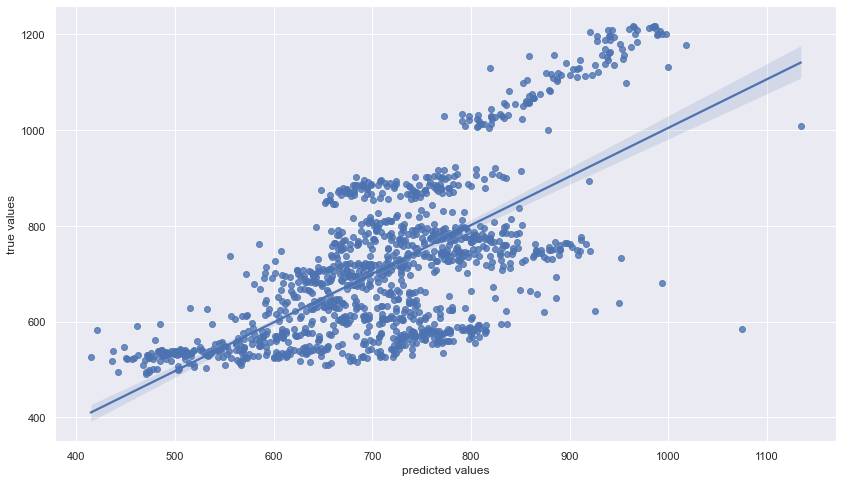

In [242]:
truepredplot(y_train, predict_ridge)

Те ж саме, що і просто з лінійною, можливо десь ближче до відповіді, але зовсім не суттєво

<font size="5">Тепер спробуємо Polynomial regression використовуючи pipeline, PolynomialFeatures в поєднанні з LinearRegression:</font> <br>

In [267]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_reg = Pipeline([('poly', poly), ('regressor', linreg)])

Яке число для degree краще підійде перевіримо вручну <br>
include_bias=False, тому що ми будемо використовувати це разом із LinearRegression, а вона подбає про це налаштування сама

In [268]:
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('regressor', LinearRegression())])

In [269]:
predict_poly = poly_reg.predict(X_test)

regression_score(y_test, predict_poly)

RMSE: 64.07878855375044
MSE: 4106.091142516259
R2: -23.768149233341763
MAPE: 52.51993926241094


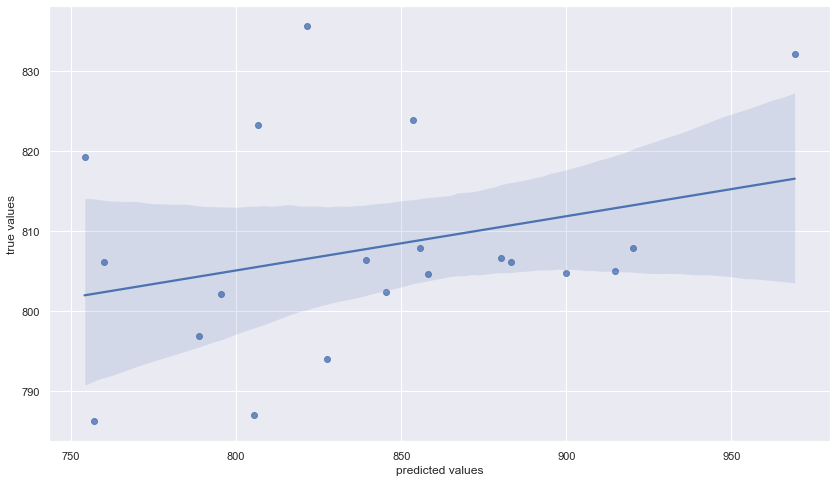

In [270]:
truepredplot(y_test, predict_poly)

In [271]:
predict_poly = poly_reg.predict(X_train)

regression_score(y_train, predict_poly)

RMSE: 100.6789336233213
MSE: 10136.247675529135
R2: 0.6262699045522313
MAPE: 80.82249997180335


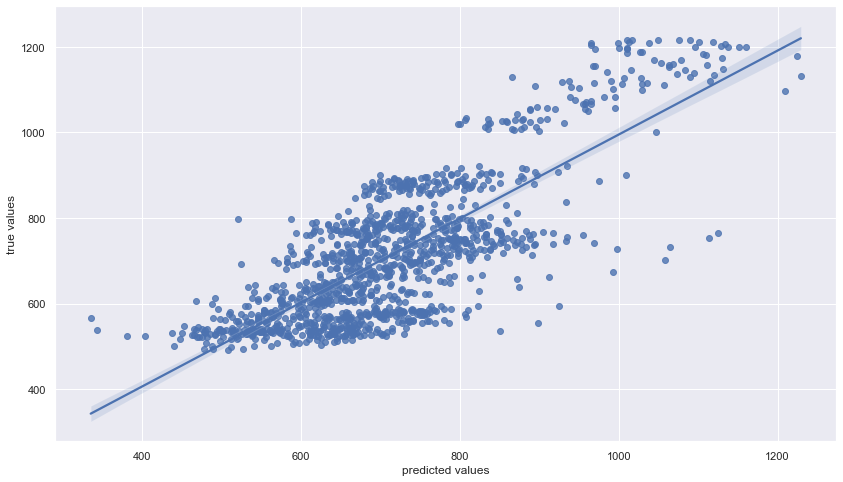

In [272]:
truepredplot(y_train, predict_poly)

Тепер для degree=3

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)

poly_reg = Pipeline([('poly', poly), ('regressor', linreg)])

In [ ]:
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('regressor', LinearRegression())])

In [ ]:
predict_poly = poly_reg.predict(X_test)

regression_score(y_test, predict_poly)

RMSE: 481.34122470112214
MSE: 231689.37459677615
R2: -1396.5620137540216
MAPE: 347.13815145082197


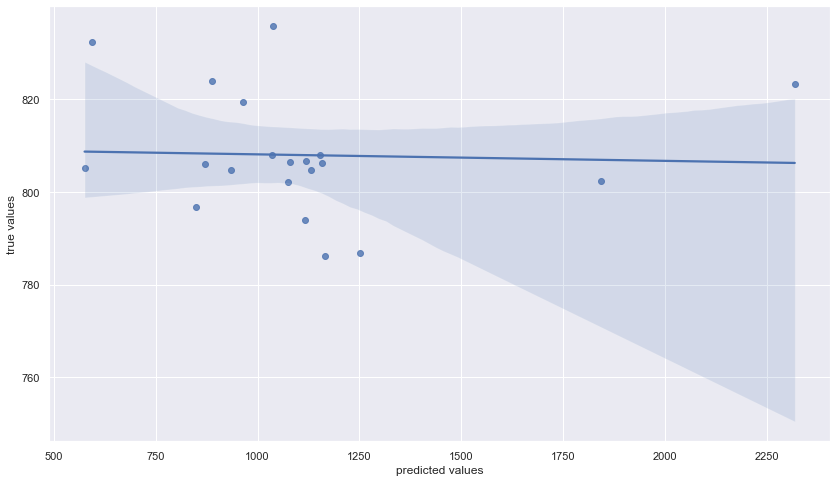

In [ ]:
truepredplot(y_test, predict_poly)

In [ ]:
predict_poly = poly_reg.predict(X_train)

regression_score(y_train, predict_poly)

RMSE: 454.3438567013725
MSE: 206428.3401222773
R2: -6.6111482006575795
MAPE: 273.67853143285555


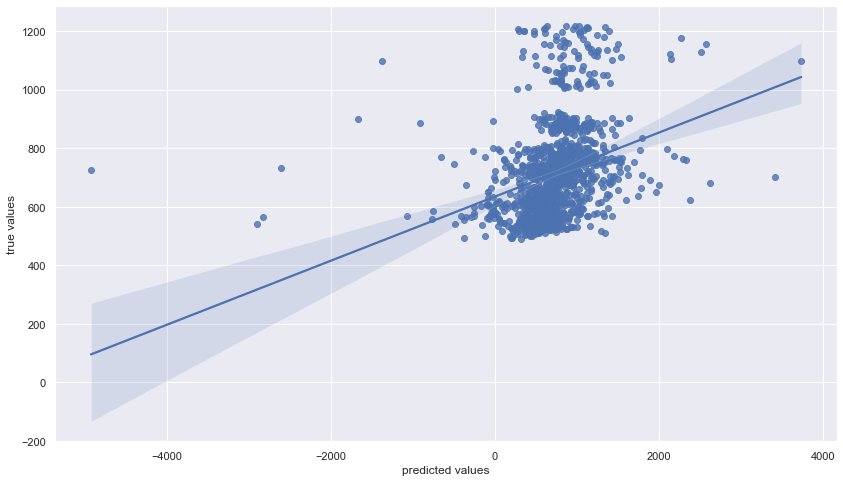

In [ ]:
truepredplot(y_train, predict_poly)

Degree = 4

In [ ]:
poly = PolynomialFeatures(degree=4, include_bias=False)

poly_reg = Pipeline([('poly', poly), ('regressor', linreg)])

In [ ]:
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=4, include_bias=False)),
                ('regressor', LinearRegression())])

In [ ]:
predict_poly = poly_reg.predict(X_test)

regression_score(y_test, predict_poly)

RMSE: 115.69391304824873
MSE: 13385.08151641574
R2: -79.73948799292069
MAPE: 98.53756950170407


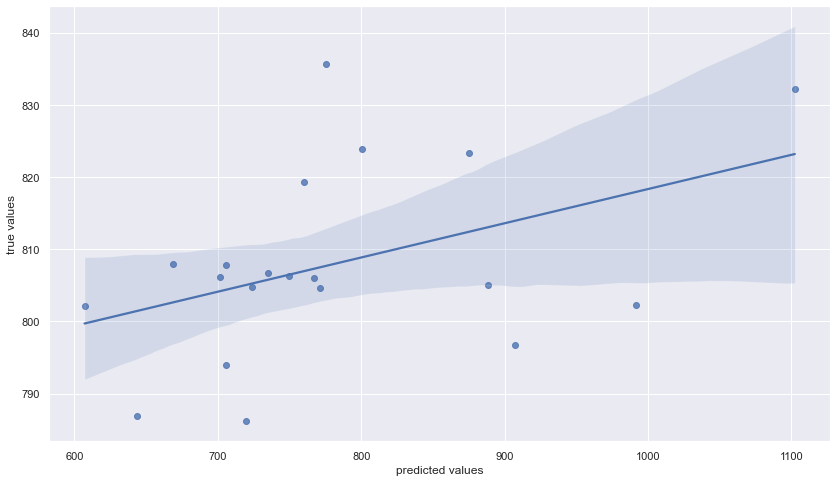

In [ ]:
truepredplot(y_test, predict_poly)

In [ ]:
predict_poly = poly_reg.predict(X_train)

regression_score(y_train, predict_poly)

RMSE: 118.46994629683789
MSE: 14035.128175575654
R2: 0.4825156250529625
MAPE: 86.86409545986272


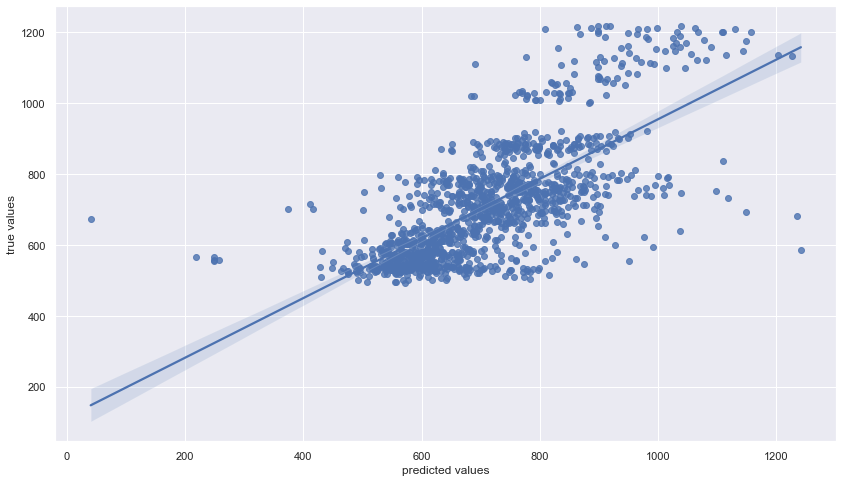

In [ ]:
truepredplot(y_train, predict_poly)

D = 8

In [277]:
poly = PolynomialFeatures(degree=7, include_bias=False)

poly_reg = Pipeline([('poly', poly), ('regressor', linreg)])

In [278]:
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=7, include_bias=False)),
                ('regressor', LinearRegression())])

In [279]:
predict_poly = poly_reg.predict(X_test)

regression_score(y_test, predict_poly)

RMSE: 115.18549330426185
MSE: 13267.697867746154
R2: -79.03142389329605
MAPE: 111.32836696281883


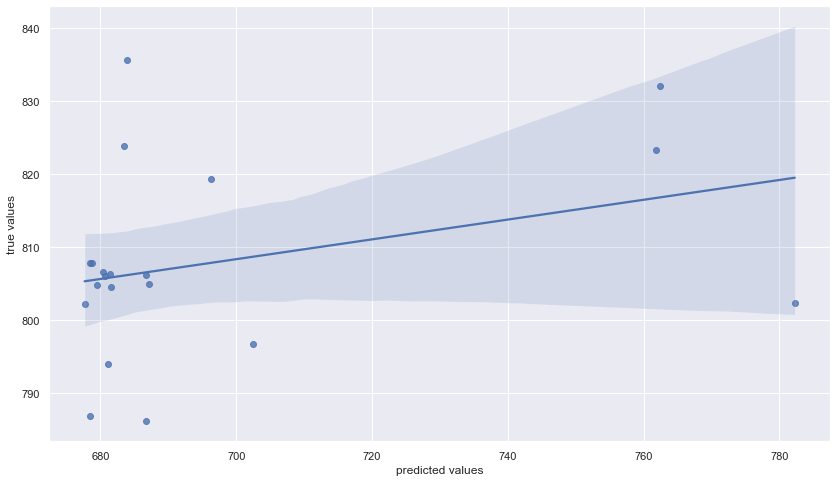

In [280]:
truepredplot(y_test, predict_poly)

In [281]:
predict_poly = poly_reg.predict(X_train)

regression_score(y_train, predict_poly)

RMSE: 149.4090397636058
MSE: 22323.061163082733
R2: 0.17693410360261597
MAPE: 115.47525791656774


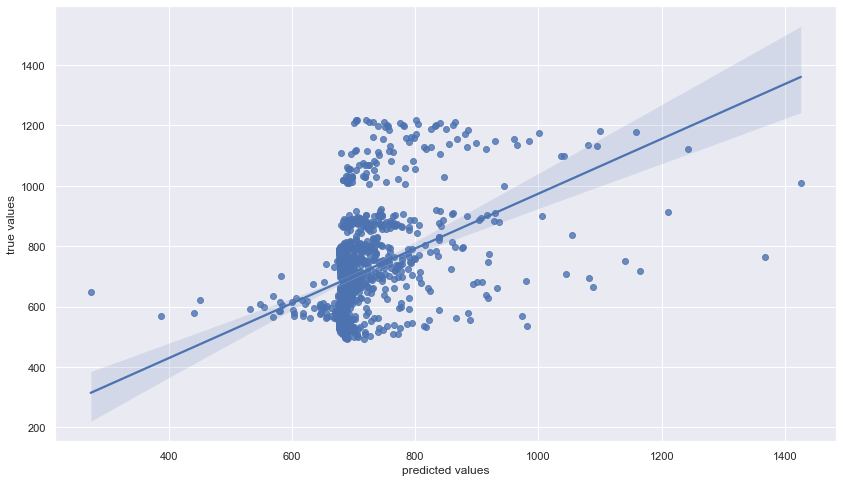

In [282]:
truepredplot(y_train, predict_poly)

Найкраще всього себе показало Degree=2, але це не означає, що вона хоч якось доцільна для використання, D = 3 була зовсім відірвана від реальності з вражаючим значенням R^2, приблизно -1400, D = 4, також не змогла показати якісь гарні результат <br>
Збільшеня параметру degree ні до чого не привели 

<font size=5>Висновок:</font> <br>
У даній лабораторній роботі я навчився будувати та оцiнювати якостi моделей дерев рiшень та опорних векторiв для класифiкацiї та регресiї засобами бiблiотеки Scikit-Learn Python